<a href="https://colab.research.google.com/github/matheusmf1/ECM514_Data_Science/blob/master/NLP_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Análise de Sentimentos de avaliações de filmes a portir de reviews do IMDB

- negativo
- positivo

In [1]:
import nltk
nltk.download('popular')
import pandas as pd
import numpy as np

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

# DataSet IMDB

In [2]:
df_imdb = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/Data Science Class/DataSets/imdb-reviews-pt-br.csv' )
df_imdb.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
df_imdb_pt = df_imdb[ ['text_pt', 'sentiment'] ]
df_imdb_pt.head()

,text_pt,sentiment
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,Este é um exemplo do motivo pelo qual a maiori...,neg
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,Filmes de fotos de latão não é uma palavra apr...,neg


## Vamos pegar o neg e pos e substituir por 0 e 1


In [4]:
df_imdb_pt.sentiment.unique()

array(['neg', 'pos'], dtype=object)

In [5]:
df_imdb_pt.sentiment.replace( { 'neg': 0, 'pos': 1 }, inplace=True )
df_imdb_pt.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,text_pt,sentiment
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,Este é um exemplo do motivo pelo qual a maiori...,0
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,Nem mesmo os Beatles puderam escrever músicas ...,0
4,Filmes de fotos de latão não é uma palavra apr...,0


In [6]:
df_imdb_pt.text_pt[0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

# Vamos deixar tudo em minúsculo

In [7]:
df_imdb_pt['text_pt'] = df_imdb_pt['text_pt'].apply( str.lower )
df_imdb_pt.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text_pt,sentiment
0,"mais uma vez, o sr. costner arrumou um filme p...",0
1,este é um exemplo do motivo pelo qual a maiori...,0
2,"primeiro de tudo eu odeio esses raps imbecis, ...",0
3,nem mesmo os beatles puderam escrever músicas ...,0
4,filmes de fotos de latão não é uma palavra apr...,0


# Modelo de referência

In [8]:
x = df_imdb_pt['text_pt'].values
x

array(['mais uma vez, o sr. costner arrumou um filme por muito mais tempo do que o necessário. além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. a maioria de nós tem fantasmas no armário, e o personagem costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. o personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, ashton kutcher. o problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. seu único obstáculo parece estar vencendo costner. finalmente, quando estamos bem além do meio do caminho, costner nos conta sobre os fantasmas dos kutchers. somos informados de por que kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.',
       'est

In [9]:
y = df_imdb_pt['sentiment'].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
from sklearn.model_selection import train_test_split

x_treino, x_test, y_treino, y_test = train_test_split( x, y, test_size = 0.25 )

In [11]:
x_treino.shape

(37094,)

In [12]:
x_test.shape

(12365,)

In [13]:
x_treino[:2]

array(['este filme foi tão ruim que foi engraçado! por um tempo pensei que estava assistindo a uma paródia de um filme ruim a la "for your consideration". a cena do "cliffhanger" no final me fez rir até que minhas entranhas doeram. o roteiro foi terrível o suficiente, mas juntamente com a atuação terrível de sean young - especialmente quando ela explica todo o enredo em grande detalhe completo com flashbacks enquanto balançando de um penhasco - torna um filme verdadeiramente classicamente ruim vale a pena assistir! na verdade, os tiros falsos nessa cena me lembraram um filme de ed wood. eu ainda não consigo acreditar como essa coisa foi feita. primeiro de tudo, como um roteiro tão ruim conseguiu a luz verde? como os atores principais se apegaram? eles estavam em pontos baixos em suas carreiras? perguntas, perguntas',
       'com filmes como esse, você sabe que vai receber as piadas habituais sobre fantasmas. eva como um fantasma é muito engraçado. e os outros atores também fazem um bom

In [14]:
y_treino[:2]

array([0, 0])

# Criando Bag of Words ( BoW )

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer( analyzer = 'word' )

In [16]:
vect.fit( x_treino )

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [17]:
print( vect.vocabulary_ )

{'este': 40904, 'filme': 44613, 'foi': 45624, 'tão': 108404, 'ruim': 93354, 'que': 86779, 'engraçado': 38306, 'por': 83319, 'um': 108696, 'tempo': 104348, 'pensei': 80636, 'estava': 40899, 'assistindo': 9112, 'uma': 108697, 'paródia': 79667, 'de': 28329, 'la': 62844, 'for': 45773, 'your': 114117, 'consideration': 24193, 'cena': 19256, 'do': 33924, 'cliffhanger': 21493, 'no': 75654, 'final': 44717, 'me': 69719, 'fez': 44342, 'rir': 92072, 'até': 9964, 'minhas': 71404, 'entranhas': 38754, 'doeram': 34073, 'roteiro': 92989, 'terrível': 104727, 'suficiente': 101789, 'mas': 68729, 'juntamente': 60680, 'com': 22400, 'atuação': 9943, 'sean': 95520, 'young': 114105, 'especialmente': 40299, 'quando': 86711, 'ela': 36330, 'explica': 42426, 'todo': 105790, 'enredo': 38477, 'em': 36767, 'grande': 50095, 'detalhe': 31995, 'completo': 22975, 'flashbacks': 45152, 'enquanto': 38446, 'balançando': 11188, 'penhasco': 80557, 'torna': 106164, 'verdadeiramente': 110212, 'classicamente': 21313, 'vale': 1094

In [18]:
print( len( vect.vocabulary_ ) )

115073


## Exemplo de uma avaliação

In [19]:
df_imdb_pt.text_pt[0]

'mais uma vez, o sr. costner arrumou um filme por muito mais tempo do que o necessário. além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. a maioria de nós tem fantasmas no armário, e o personagem costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. o personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, ashton kutcher. o problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. seu único obstáculo parece estar vencendo costner. finalmente, quando estamos bem além do meio do caminho, costner nos conta sobre os fantasmas dos kutchers. somos informados de por que kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [20]:
BoW_Exemplo = vect.transform( [ df_imdb_pt.text_pt[0] ] )
BoW_Exemplo

<1x115073 sparse matrix of type '<class 'numpy.int64'>'
	with 107 stored elements in Compressed Sparse Row format>

In [21]:
BoW_Exemplo.toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

## BoW em todo o DataSet

In [23]:
box_x_treino = vect.transform( x_treino )
box_x_test = vect.transform( x_test )

In [25]:
box_x_treino
#  dimensao bate com os reviews 

<37094x115073 sparse matrix of type '<class 'numpy.int64'>'
	with 4962181 stored elements in Compressed Sparse Row format>

# Classificador 

In [26]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

In [27]:
model.fit( box_x_treino, y_treino )

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Testando o modelo

In [32]:
texto_teste = [ 'O melhor filme da minha vida. Incrivel!',
               'O produtor realmente errou feio. Filme muito ruim.',
               'Adorei o filme, por mim ficaria horas no cinema.',
               'Filme meio parado, sem ação e não senti empatia pelos personagens.',
               'Horrivel',
               'Excelente', 
               'Muito bom o filme, só que não',
               'Muito ruim o filme, só que não'
               ]

box_texto_teste = vect.transform( texto_teste )

In [33]:
saida_teste = model.predict( box_texto_teste )

dict_resp = { 0: 'Negativo', 1: 'Positivo' }

for i in saida_teste:
  print( dict_resp[i] )

Negativo
Negativo
Positivo
Negativo
Negativo
Positivo
Negativo
Negativo


## Validando o modelo

In [34]:
print( model.score( box_x_treino, y_treino ) )
print( model.score( box_x_test, y_test ) )

0.9058877446487302
0.8537808329963607


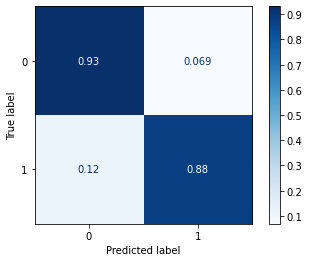

In [37]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt



plot_confusion_matrix( estimator = model, X = box_x_treino, y_true = y_treino, normalize = 'true', cmap=plt.cm.Blues )

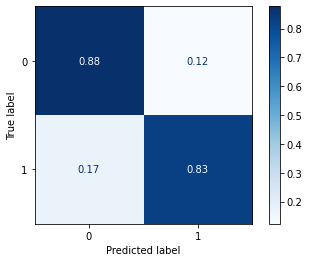

In [38]:
plot_confusion_matrix( estimator = model, X = box_x_test, y_true = y_test, normalize = 'true', cmap=plt.cm.Blues )

# Adicionando Pré-processamento

- Tornar possível usar algoritmos mais complexos para explorar esses dados que estão exparsos

- Diminuir a dimensionalidade

In [39]:
df_imdb_pt.head()

,text_pt,sentiment
0,"mais uma vez, o sr. costner arrumou um filme p...",0
1,este é um exemplo do motivo pelo qual a maiori...,0
2,"primeiro de tudo eu odeio esses raps imbecis, ...",0
3,nem mesmo os beatles puderam escrever músicas ...,0
4,filmes de fotos de latão não é uma palavra apr...,0
